In [1]:
%pylab nbagg
from tvb.simulator.lab import *

Populating the interactive namespace from numpy and matplotlib
   INFO  NumExpr defaulting to 4 threads.
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor.state_variable_range = Final(field_type=<class 'dict'>, default={'x1': array([-2.,  1.]), 'y1': array([-20.,   2.]), 'z': array([2., 5.]), 'x2': array([-2.,  0.]), 'y2': array([0., 2.]), 'g': array([-1.,  1.])}, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.epileptor.Epileptor2D.tt = NArray(label='tt', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor2D.state_variable_range = Final(field_type=<class 'dict'>, default={'x1': array([-2.,  1.]), 'z': array([2., 5.])}, required=True)
WARNING 

WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.stefanescu_jirsa.ReducedSetFitzHughNagumo.state_variable_range = Final(field_type=<class 'dict'>, default={'xi': array([-4.,  4.]), 'eta': array([-3.,  3.]), 'alpha': array([-4.,  4.]), 'beta': array([-3.,  3.])}, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindmarshRose.a = NArray(label=':math:`a`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
WARNING  default contains values out of the declared domain. Ex 3.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindmarshRose.b = NArray(label=':math:`b`', dtype=float64, default=array([3.]), dim_names=(), ndim=None, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindma

# Simulation with the reduced Wong-Wang model

Gustavo et al and Hansen et al 2015 used the reduced Wong-Wang model to reproduce certain aspects of human resting state fMRI. This is a 1D model, so we can tune its parameters simply by plotting the derivative as a function of the state variable:

<IPython.core.display.Javascript object>


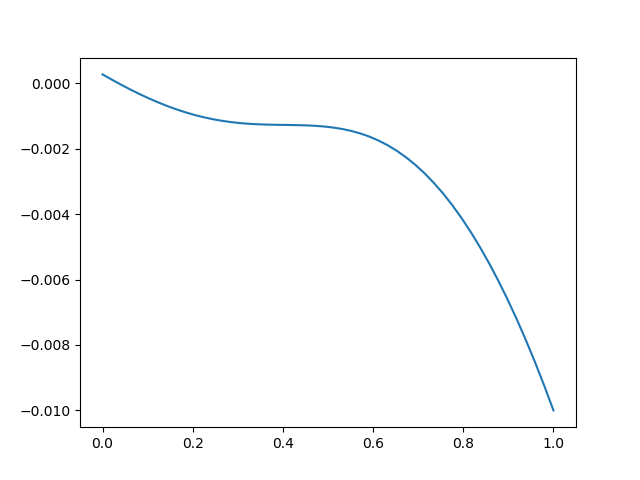

In [2]:
rww = models.ReducedWongWang(a=numpy.array([0.27]), w=numpy.array([1.0]), I_o=numpy.array([0.3]))
S = linspace(0, 1, 50).reshape((1, -1, 1))
C = S * 0.0
dS = rww.dfun(S, C)

figure()
plot(S.flat, dS.flat)

And a short simulation

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


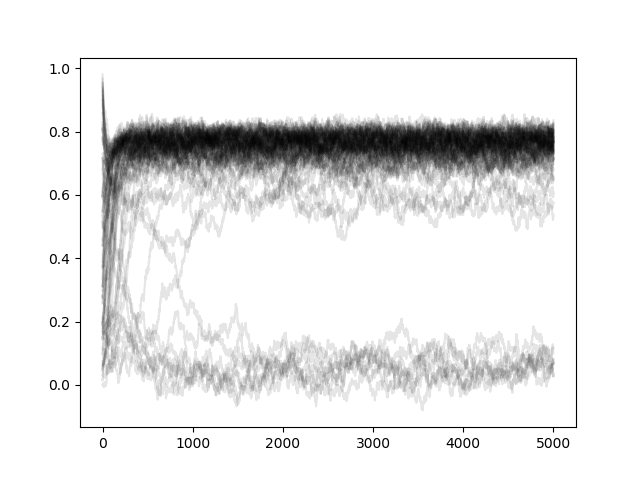

In [3]:
sim = simulator.Simulator(
    model=rww,
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.Linear(a=numpy.array([0.5 / 50.0])),
    integrator=integrators.EulerStochastic(dt=1, noise=noise.Additive(nsig=numpy.array([1e-5]))), 
    monitors=(monitors.TemporalAverage(period=1.),),
    simulation_length=5e3
).configure()

(time, data), = sim.run()

figure()
plot(time, data[:, 0, :, 0], 'k', alpha=0.1);

## References

[DPA_2013]     Deco Gustavo, Ponce Alvarez Adrian, Dante Mantini, Gian Luca Romani, Patric Hagmann and Maurizio Corbetta. Resting-State Functional Connectivity Emerges from Structurally and Dynamically Shaped Slow Linear Fluctuations. The Journal of Neuroscience 32(27), 11239-11252, 2013.